In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
filenames = ["spotify_history_2020_2021.csv","spotify_history_2021_2022.csv","spotify_history_2022_2023.csv"]

In [16]:
files = [file for file in filenames]
df = pd.concat(map(pd.read_csv, files),ignore_index=True)

In [82]:
df.shape

(42532, 14)

In [18]:
df.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2020-02-04T09:36:57Z,dmurat125,"iOS 13.3 (iPhone10,2)",200946,TR,46.106.99.106,unknown,No Regrets (feat. Don Toliver),Eminem,Music To Be Murdered By,...,NaN,NaN,NaN,clickrow,trackdone,False,NaN,False,1580808731423,False
1,2020-02-04T11:42:12Z,dmurat125,"iOS 13.3 (iPhone10,2)",500,TR,46.106.99.106,unknown,Lock It Up (feat. Anderson .Paak),Eminem,Music To Be Murdered By,...,NaN,NaN,NaN,backbtn,backbtn,False,NaN,False,1580816525409,False
2,2020-02-04T11:42:12Z,dmurat125,"iOS 13.3 (iPhone10,2)",480,TR,46.106.99.106,unknown,Little Engine,Eminem,Music To Be Murdered By,...,NaN,NaN,NaN,backbtn,fwdbtn,False,NaN,False,1580816525926,False
3,2020-02-04T11:42:12Z,dmurat125,"iOS 13.3 (iPhone10,2)",140,TR,46.106.99.106,unknown,"I Will (feat. KXNG Crooked, Royce Da 5'9"" & Jo...",Eminem,Music To Be Murdered By,...,NaN,NaN,NaN,backbtn,backbtn,False,NaN,False,1580816524849,False
4,2020-02-04T11:42:12Z,dmurat125,"iOS 13.3 (iPhone10,2)",160,TR,46.106.99.106,unknown,No Regrets (feat. Don Toliver),Eminem,Music To Be Murdered By,...,NaN,NaN,NaN,backbtn,backbtn,False,NaN,False,1580816525009,False


In [21]:
#Drop unused columns
used_cols=['ts','ms_played','master_metadata_track_name','master_metadata_album_artist_name','master_metadata_album_album_name','reason_start','reason_end','shuffle']
df = df[used_cols]
df['ts'] = pd.to_datetime(df['ts'])
df.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,reason_start,reason_end,shuffle
0,2020-02-04 09:36:57+00:00,200946,No Regrets (feat. Don Toliver),Eminem,Music To Be Murdered By,clickrow,trackdone,False
1,2020-02-04 11:42:12+00:00,500,Lock It Up (feat. Anderson .Paak),Eminem,Music To Be Murdered By,backbtn,backbtn,False
2,2020-02-04 11:42:12+00:00,480,Little Engine,Eminem,Music To Be Murdered By,backbtn,fwdbtn,False
3,2020-02-04 11:42:12+00:00,140,"I Will (feat. KXNG Crooked, Royce Da 5'9"" & Jo...",Eminem,Music To Be Murdered By,backbtn,backbtn,False
4,2020-02-04 11:42:12+00:00,160,No Regrets (feat. Don Toliver),Eminem,Music To Be Murdered By,backbtn,backbtn,False


In [23]:
#adding new columns
df['year'] = pd.DatetimeIndex(df['ts']).year 
df['month'] = pd.DatetimeIndex(df['ts']).month 
df['month_name'] = df['ts'].dt.month_name()
df['day'] = pd.DatetimeIndex(df['ts']).day 
df['hour'] = pd.DatetimeIndex(df['ts']).hour
df['day_name'] = df['ts'].dt.day_name()
df.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,reason_start,reason_end,shuffle,year,month,day,hour,day_name,month_name
0,2020-02-04 09:36:57+00:00,200946,No Regrets (feat. Don Toliver),Eminem,Music To Be Murdered By,clickrow,trackdone,False,2020,2,4,9,Tuesday,February
1,2020-02-04 11:42:12+00:00,500,Lock It Up (feat. Anderson .Paak),Eminem,Music To Be Murdered By,backbtn,backbtn,False,2020,2,4,11,Tuesday,February
2,2020-02-04 11:42:12+00:00,480,Little Engine,Eminem,Music To Be Murdered By,backbtn,fwdbtn,False,2020,2,4,11,Tuesday,February
3,2020-02-04 11:42:12+00:00,140,"I Will (feat. KXNG Crooked, Royce Da 5'9"" & Jo...",Eminem,Music To Be Murdered By,backbtn,backbtn,False,2020,2,4,11,Tuesday,February
4,2020-02-04 11:42:12+00:00,160,No Regrets (feat. Don Toliver),Eminem,Music To Be Murdered By,backbtn,backbtn,False,2020,2,4,11,Tuesday,February


In [12]:
#most listened 10 song
dic = {}
i = 0
while i < len(df):
    if str(df["master_metadata_track_name"][i]) != "nan":
        song = df["master_metadata_track_name"][i]
        if song not in dic:
            dic[song] = df["ms_played"][i]
        else:
            dic[song] += df["ms_played"][i]
    i = i+1
    
i = 0
while i < 10:
    maxx = max(dic, key=lambda a: dic[a])
    print(maxx, end=" ")
    convert_ms_to_minute = dic[maxx] / (1000 * 60)
    convert_ms_to_minute = int(convert_ms_to_minute)
    print(convert_ms_to_minute)
    dic.pop(maxx)
    i = i+1

KHRBR 2172
Chicago Freestyle (feat. Giveon) 979
Nude 844
Gerçekleşebilir 800
Bad and Boujee (feat. Lil Uzi Vert) 784
Zehirli Melodiler 781
MAFIA 779
Hala Bir Umut Var 741
Believe Me 733
Holy Key (feat. Big Sean, Kendrick Lamar & Betty Wright) 728


In [27]:
#most listened song month
max_month = df["month_name"].value_counts().idxmax()
print("Most music listened month: ",max_month)

Most music listened month:  March


In [24]:
#top 3 album
dic3 = {}
i = 0
while i < len(df):
    if str(df["master_metadata_album_album_name"][i]) != "nan":
        album = df["master_metadata_album_album_name"][i]
        if album not in dic3:
            dic3[album] = df["ms_played"][i]
        else:
            dic3[album] += df["ms_played"][i]
    i = i+1
i = 0
while i < 3:
    maxx = max(dic3,key=lambda q:dic3[q])
    print(maxx, end=" ")
    convert_ms_to_minute = dic3[maxx] / (1000 * 60)
    convert_ms_to_minute = int(convert_ms_to_minute)
    print(convert_ms_to_minute)
    dic3.pop(maxx)
    i = i+1

Music To Be Murdered By 3586
Certified Lover Boy 3039
The Marshall Mathers LP2 2250


In [28]:
#top 5 artist
dic4 = {}
i = 0
while i < len(df):
    if str(df["master_metadata_album_artist_name"][i]) != "nan":
        artist = df["master_metadata_album_artist_name"][i]
        if artist not in dic4:
            dic4[artist] = df["ms_played"][i]
        else:
            dic4[artist] += df["ms_played"][i]
    i = i+1
i = 0
while i < 5:
    maxx = max(dic4,key=lambda q:dic4[q])
    print(maxx, end=" ")
    convert_ms_to_minute = dic4[maxx] / (1000 * 60)
    convert_ms_to_minute = int(convert_ms_to_minute)
    print(convert_ms_to_minute)
    dic4.pop(maxx)
    i = i+1

Eminem 11506
Drake 7008
Ati242 4794
UZI 2976
Ceg 2779


In [29]:
#most skipped song 
#skipped before 10 second

dic7 = {}
i = 0
while i < len(df):
    if str(df["master_metadata_album_artist_name"][i]) != "nan":
        time_played_second = int(df["ms_played"][i] / 1000)
        song = df["master_metadata_track_name"][i]
        if time_played_second < 10:
            if song not in dic7:
                dic7[song] = 1
            else:
                dic7[song] += 1
    i = i+1

i = 0
while i < 5:
    maxx = max(dic7,key=lambda q:dic7[q])
    print(maxx, end=" ")
    print(dic7[maxx])
    dic7.pop(maxx)
    i = i+1

Nude 150
Gamzedeyim Deva Bulmam 95
Aynen Öyle 88
Shawty 86
ne deve ne kush 85


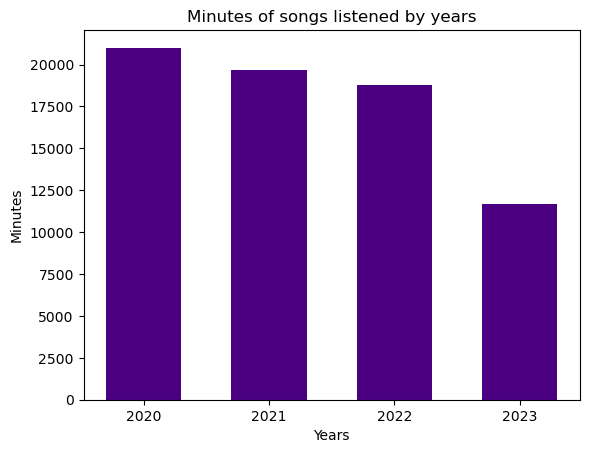

In [44]:
#Minutes of songs listened by years
dic5 = {}
i = 0
while i < len(df):
    time_played = int(df["ms_played"][i] / (1000*60))
    year = df["year"][i]
    if year not in dic5:
        dic5[year] = time_played
    else:
        dic5[year] += time_played
    i = i+1
years = list(dic5.keys())
time = list(dic5.values())

year =[2020,2021,2022,2023]
plt.bar(years, time, color='indigo', width = 0.6)
plt.title('Minutes of songs listened by years')
plt.xticks(year)
plt.xlabel('Years')
plt.ylabel('Minutes')
plt.show()

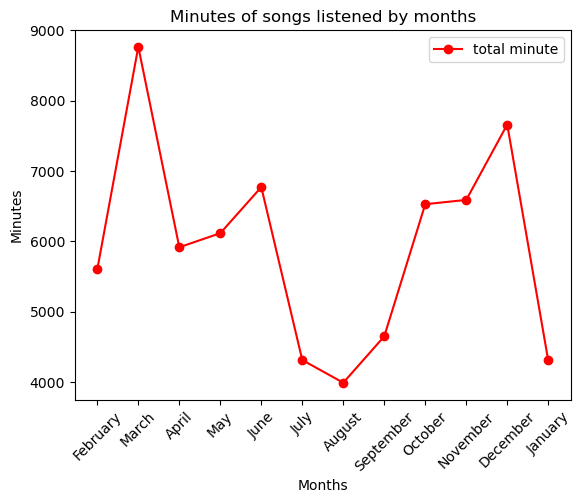

In [33]:
#Minutes of songs listened by month
dic6 = {}
i= 0
while i < len(df):
    time_played = int(df["ms_played"][i] / (1000*60))
    month = df["month_name"][i]
    if month not in dic6:
        dic6[month] = time_played
    else:
        dic6[month] += time_played
    i = i+1
months = list(dic6.keys())
time = list(dic6.values())

plt.plot(months, time, marker='o', color='red', label='total minute')
plt.title('Minutes of songs listened by months')
plt.xlabel('Months')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.legend()
plt.show()
    

shuffle
False    37427
True      5105
Name: count, dtype: int64


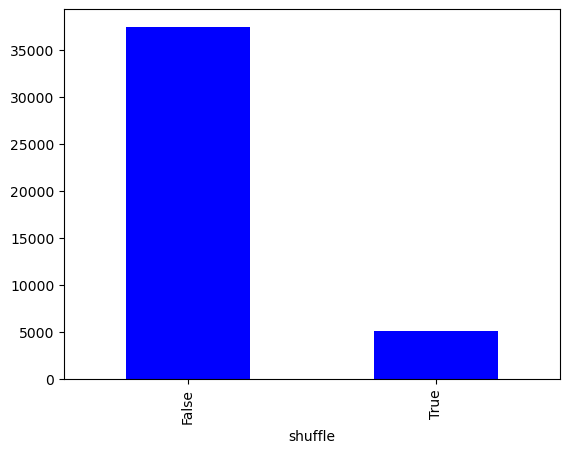

In [86]:
#check shuffle is used or not used
print(df["shuffle"].value_counts())
df["shuffle"].value_counts().plot(kind="bar", color='blue')
plt.show()

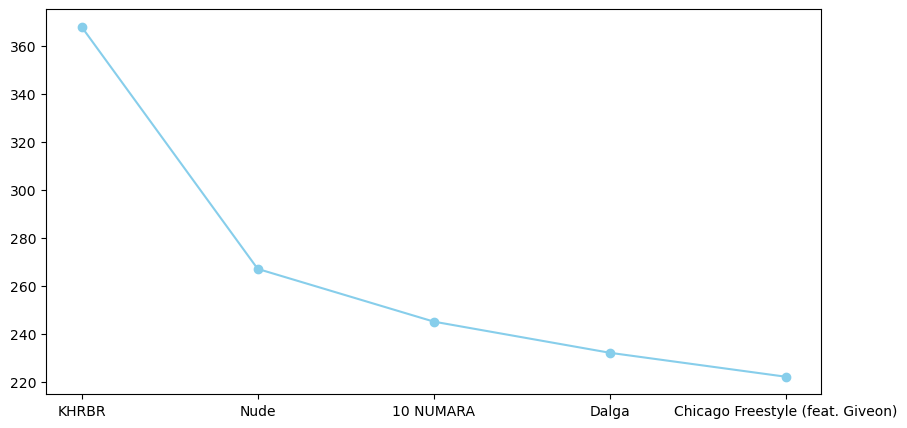

In [35]:
#Most listened songs until the end

dic8= {}
i = 0
while i<len(df):
    if df["reason_end"][i] == "trackdone":
        song = df["master_metadata_track_name"][i]
        if song not in dic8:
            dic8[song] = 1
        else:
            dic8[song] += 1
    i = i+1

dic9 = {}
i = 0
while i<5:
    maxx = max(dic8, key=lambda q:dic8[q])
    dic9[maxx] = dic8[maxx]
    dic8.pop(maxx)
    i = i+1


song_name = list(dic9.keys())
num = list(dic9.values())

plt.figure(figsize=(10, 5))
plt.plot(song_name, num, marker="o",color="skyblue")

plt.show()

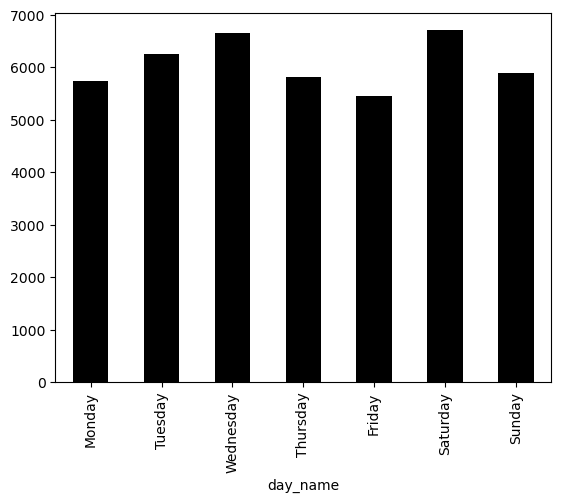

In [51]:
#Number of music played by day
order=["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["day_name"].value_counts()[order].plot(kind="bar", color='black')
plt.show()

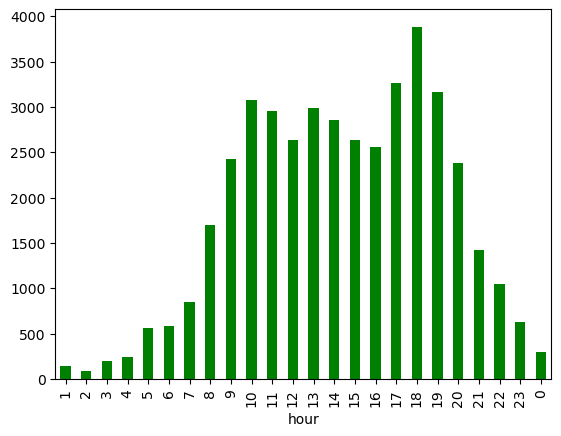

In [52]:
#Number of music played by hour
order = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0]
df["hour"].value_counts()[order].plot(kind="bar", color='green')
plt.show()

year     0.021783
month    0.051492
day     -0.008669
hour    -0.036466
dtype: float64


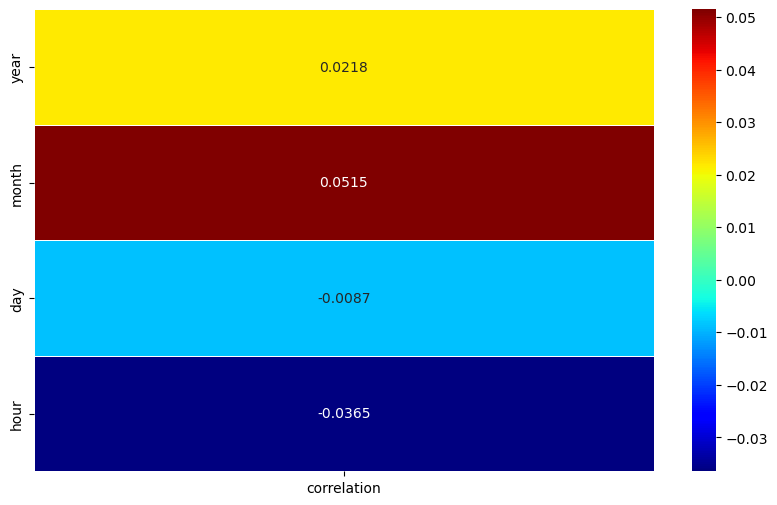

In [66]:
# correlation of ms_played with year, month, day and hour.
dff = df.select_dtypes(include=['float64','int32']).columns
corre = df[dff].corrwith(df['ms_played'])
corre = corre.to_frame(name='correlation')
plt.figure(figsize=(10, 6))
sns.heatmap(corre, annot=True, cmap='jet', fmt=".4f", linewidths=0.5)
plt.show()
   



In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split


X = df[dff]
y = df["ms_played"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt = DecisionTreeClassifier()

search_space = {'max_features': ['auto', 'sqrt','log2']}

grid = GridSearchCV(dt, search_space, cv=3, scoring='accuracy', return_train_score=True, verbose=10)

grid.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/Users/muratdogan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV 1/3; 1/3] START max_features=auto...........................................
[CV 1/3; 1/3] END max_features=auto;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 1/3] START max_features=auto...........................................
[CV 2/3; 1/3] END max_features=auto;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 1/3] START max_features=auto...........................................
[CV 3/3; 1/3] END max_features=auto;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 2/3] START max_features=sqrt...........................................
[CV 1/3; 2/3] END max_features=sqrt;, score=(train=0.256, test=0.011) total time=   2.2s
[CV 2/3; 2/3] START max_features=sqrt...........................................
[CV 2/3; 2/3] END max_features=sqrt;, score=(train=0.256, test=0.011) total time=   1.8s
[CV 3/3; 2/3] START max_features=sqrt...........................................
[CV 3/3; 2/3] END max_features=sqrt;, score=(train=0.257, test=0.011) total time=

/Users/muratdogan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muratdogan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/muratdogan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/muratdogan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']},
             return_train_score=True, scoring='accuracy', verbose=10)

In [83]:
best_mf = grid.best_params_['max_features']


dt = DecisionTreeClassifier(max_features=best_mf)

dt.fit(X_train, y_train)


accuracy = dt.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.011755025273304338


In [85]:
prediction = dt.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.011755025273304338
